<a href="https://colab.research.google.com/github/RodolfoFigueroa/madi2022-1/blob/main/7_Graficas_de_intervalos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx

En esta sesión exploraremos el concepto de *gráfica de intervalos*. 

*Definición.* Una gráfica de intervalos es una gráfica tal que existe al menos un conjunto de intervalos de la forma $[a,b]$ tal que los intervalos se asocian biyectivamente con los vértices de la gráfica, y dos vértices son adyacentes si y solo si los intervalos correspondientes se intersectan.

De esta definición, después de explorar un poco surgen dos preguntas naturales:


*   Dado un arreglo de intervalos, ¿cómo crear la gráfica de intervalos correspondiente? (De intervalos a gráfica).
*   Dada una gráfica, ¿cómo saber si es una gráfica de intervalos? En caso de que sí lo sea, ¿cómo construir un arreglo de intervalos correspondiente a la gráfica? (De gráfica a intervalos).

Daremos un algoritmo para la primer pregunta, (como nota, no será el más eficiente que existe, pero rescata ideas y observaciones importantes). Respecto a la segunda pregunta, existen varios teoremas que nos permiten saber cuándo una gráfica es de intervalos, veremos uno de ellos, que nos permitirá conocer una forma de construir un arreglo de intervalos correspondiente a la gráfica en caso de que exista.



**De intervalos a gráfica.** Dado un arreglo de intervalos $[a_1,b_1], [a_2, b_2], \dots, [a_n, b_n]$, veamos cómo crear la gráfica correspondiente. Seguiremos los siguientes pasos:

*   Ordenamos los intervalos según su extremo izquierdo. Podemos entonces suponer que $a_1 \leq a_2 \leq \dots \leq a_n$. (Usaremos por ahora la función *sort*, en un futuro no muy lejano veremos algoritmos de ordenamiento).
*   Notemos que si $a_i \leq a_j$, entonces el intervalo $[a_i, b_i]$ intersecta al intervalo $[a_j, b_j]$ si y solo si $a_j < b_i$.
*   Notemos también que dados tres intervalos $[a_i, b_i], [a_j, b_j], [a_k, b_k]$ con $a_i \leq a_j \leq a_k$, si $[a_j, b_j]$ no intersecta a $[a_i, b_i]$ entonces $[a_k, b_k]$ tampoco intersecta a $[a_i, b_i]$.
*   Considerando lo anterior, basta con revisar si los extremos izquierdos de los segmentos se intersectan con alguno de los segmentos que aparecen antes (pues ya fueron ordenados). Para esto, hacemos un conjunto, en donde metemos a $[a_1, b_1]$, y en cada paso lo que hacemos es verificar en qué intervalos del conjunto $a_i$ está contenido, y en los que no aparezca los eliminamos del conjunto, y metemos $[a_i, b_i]$ al conjunto. Iteramos este proceso para cada $i$, y vamos conectando los vértices según corresponda.



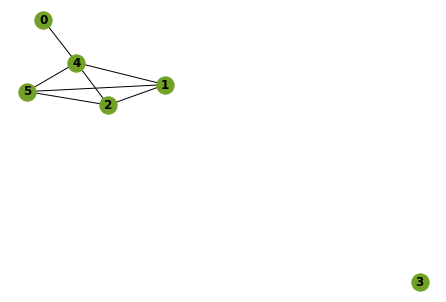

In [ ]:
# Los primeros dos números son los extremos del intervalo, el tercero es la etiqueta
Interv = [(1, 2, 0), (4,5, 1), (3,4, 2), (8,15,3), (0,5,4), (3,6,5)]

#add discard
Interv.sort()
S = {Interv[0]}
G = nx.Graph()
to_erase = set()

G.add_node(Interv[0][2])

for i in range (1, len(Interv)):
  G.add_node(Interv[i][2])
  for R in S:
    if(Interv[i][0] <= R[1]):
      G.add_edge(Interv[i][2], R[2])
    else:
      to_erase.add(R)
  for R in to_erase:
    S.discard(R)
  to_erase.clear()
  S.add(Interv[i])

nx.draw(G, with_labels=True, font_weight='bold', node_color='#71A125')


**De gráfica a intervalos.** Esta pregunta es considerablemente más complicada. Nos dedicaremos a estudiar un teorema y algoritmo relacionados, sin realizar las implementaciones correspondientes. Para esto, daremos algunas definiciones antes de entrar en materia.

*Orden parcial estricto.* Un orden parcial estricto sobre un conjunto $S$ es una relación binaria $\rightarrow$ que satisface:
*   $a\rightarrow a$ no está definido. Es decir, $a$ no es comparable con $a$.
*   Si $a \rightarrow b$ entonces no pasa que $b \rightarrow a$.
*   Si $a\rightarrow b$ y $b \rightarrow c$, entonces $a\rightarrow c$.

*Transitividad en una gráfica.* Diremos que una gráfica posee orden transitivo si existe al menos una forma de darle dirección a sus aristas de modo que representen un orden parcial estricto.

Algunos ejemplos de orden parcial estricto son:
*   La relación $"<"$ (menor que)
*   La relación $\rightarrow$ sobre los enteros positivos dada por $a \rightarrow b$ si $a \neq b$ y $a$ divide a $b$.

Con esto en mente, podemos asignarle un orden parcial estricto de la siguiente forma: si $[a, b], [c, d]$ son intervalos en el arreglo que no se intersectan, entonces $[a,b] \rightarrow [c, d]$ si $a < c$. 


Diremos entonces que un orden parcial estricto sobre un conjunto $S = \{s_1, s_2, \dots, s_n\}$ (en el futuro vamos a decirle copo por comodidad, por conjunto parcialmente ordenado) es un *orden de intervalos* si para cada $s_i \in S$, existe un intervalo $[a_{s_i}, b_{s_i}]$, de modo que los intervalos asignados a los elementos de $S$ cumplan que su orden parcial asignado (el mencionado en el párrafo anterior) sea igual al copo con el que empezamos.


*$\underline{\text{Teorema.}}$* Un copo $(S, \rightarrow)$ es un orden de intervalos si y solo si se cumple que no existen elementos distintos $a_1, a_2, b_1, b_2 \in S$ tales que:
*   $a_1 \rightarrow a_2$
*   $b_1 \rightarrow b_2$

Y estas son las únicas relaciones que se dan entre los elementos $a_1, a_2, b_1, b_2$. Si existen $a_1, a_2, b_1, b_2$ tales que se cumple lo anterior, diremos que forman un cuarteto malo.

No daremos la demostración de este teorema, a modo de hint, nota que si dos elementos no se relacionan es porque los intervalos asociados se intersectan, en particular para el regreso del si y solo si, considerar un elemento maximal del copo puede ser útil.


Teniendo en cuenta el teorema anterior, dado un copo $C = (S, \rightarrow)$ podemos determinar algortítmicamente si es un orden de intervalos o no. Para esto, vamos a hacer uso de dos definiciones: 
*   Sea $s \in S$, se define el conjunto $D(s) = \{t | \; t \in S, t \rightarrow s\}$.
*   Sea $s \in S$, se define el conjunto $U(s) = \{t | \; t \in S, s \rightarrow t\}$.

Notemos que si existen $s_1, s_2 \in S$ tales que $D(s_1), D(s_2)$ no son comparablees por inclusión (es decir, ninguno es subconjunto del otro), entonces tendremos que existen $t_1 \in D(s_1) - D(s_2), t_2 \in D(s_2) - D(s_1)$, y entonces $t_1, s_1, t_2, s_2$ forman un cuarteto malo. De aquí, concluimos que si todos los conjuntos $D(s)$ con $s \in S$ son comparables por inclusión, entonces $C$ es un orden de intervalos.
<!-- 
$t_1 \in D(s_1)-D(s_2) \subset D(s_1) \Rightarrow t_1 \righarrow s_1$, análogamente, $t_2 \rightarrow s_2$.

Supongamos que $s_1 \rightarrow s_2$, si tenemos $c \rightaroow s_1$, por transitividad vamos a tener que $c \rightarrow s_2$, entonces $D(s_1) \subset D(s_2)$, contradicci\'on.  -->






¿Cómo encontrar intervalos que cumplan con el orden que indica $C$? Seguimos los siguientes pasos:

1.   Ordenamos los conjuntos $D(s)$ con $s \in S$ de menor a mayor (según la inclusión), y al $k$-ésimo conjunto le asignamos el entero $k$. 
2.   Hacemos lo mismo que en el paso 1, pero con los conjuntos $U(s)$ con $s \in S$, y se ordenan de mayor a menor.
3.   A cada $s \in S$ le asignamos el intervalo $[a, b]$, donde $a$ es el valor asignado a $D(s)$, y $b$ el valor asignado a $U(s)$.



¿De qué nos sirve todo esto para determinar si una gráfica representa una gráfica de intervalos? 

Dada una gráfica $G$, consideremos su complemento $\overline{G}$. Si $\overline{G}$ no posee orden transitivo entonces $G$ no puede ser una gráfica de intervalos, pues si lo fuera, el copo inducido por los intervalos correspondientes inducirían un orden transitivo en el complemento de $G$. Si $\overline{G}$ posee orden transitivo puede que $G$ sí sea una gráfica de intervalos.

Si $\overline{G}$ posee orden transitivo, sea $C$ el copo asociado al orden que determina $\overline{G}$, y como vimos anteriormente, podemos determinar si $C$ es un orden de intervalos o no, en caso de que no lo sea, concluimos que $G$ no es gráfica de intervalos, y en caso de que sí sea orden de intervalos, el acomodo correspondiente a $C$, también es una representación de intervalos que nos dan a $G$ como la gráfica de intervalos asociada.

Pueden consultar más al respecto en https://sites.gatech.edu/math3012openresources/lecture-videos/lecture-16/

**Ejercicios**

1.   Dado un arreglo de rectángulos en $\mathbb{R}^2$ con lados paralelos a los ejes. Crea su gráfica de intersecciones. Los cuadrados estarán dados por $((a_1, b_1), (a_2, b_2), c)$, donde $(a_1, b_1)$ es la esquina inferior izquierda, $(a_2, b_2)$ la esquina superior derecha, y $c$ la etiqueta del rectángulo correspondiente.

2.   Muestra que una gráfica de intervalos no contiene ciclos irreducibles con más de $3$ vértices. (Un ciclo es irreducible en una gráfica si no existen ciclos en los subconjuntos propios de los vértices del ciclo inicial). 

*Ejercicio 1.* Escribe aquí tu código (recuerda cómo se hizo para el caso de intervalos, te puede ser bastante útil).

In [ ]:
(Aquí va tu código)

Comprueba tu código con el siguiente ejemplo: $[((0,1), (4, 5), 1), ((2, 1), (10, 15), 2), ((12, 5), (14, 8), 3), ((-2, -1), (0,0), 4), ((-4, -5), (1, 2), 5)]$

*Ejercicio 2.* Escribe aquí o sube una foto de tu demostración.